In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
amaz = pd.read_csv('amazon_cells_labelled.txt', sep="\t", header = None)
amaz.columns = ['message','positive']

amaz['all_caps'] = amaz.message.str.isupper()
print(amaz)

                                               message  positive  all_caps
0    So there is no way for me to plug it in here i...         0     False
1                          Good case, Excellent value.         1     False
2                               Great for the jawbone.         1     False
3    Tied to charger for conversations lasting more...         0     False
4                                    The mic is great.         1     False
5    I have to jiggle the plug to get it to line up...         0     False
6    If you have several dozen or several hundred c...         0     False
7          If you are Razr owner...you must have this!         1     False
8                  Needless to say, I wasted my money.         0     False
9                     What a waste of money and time!.         0     False
10                     And the sound quality is great.         1     False
11   He was very impressed when going from the orig...         1     False
12   If the two were sepe

In [49]:
keywords = ['Great', 'fantastic', 'good', 'happy', 'friend', 'positive', 'nice', 'excellent', 'best']

for key in keywords:
    amaz[str(key)] = amaz.message.str.contains(' '+ str(key) + ' ', case=False)

In [50]:
amaz['positive'] = (amaz['positive'] == 1)

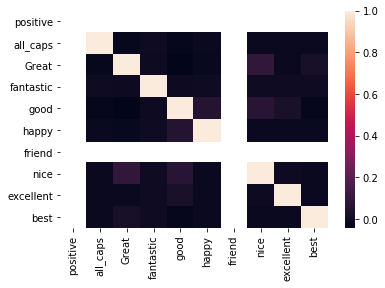

In [51]:
sns.heatmap(amaz.corr())

In [52]:
data = amaz[keywords + ['all_caps']]
target = amaz['positive']


In [53]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)


In [54]:
print("Number of positive points out of the total {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of positive points out of the total 1000 points: 0
